# Analytic Solutions of Nonlinear Coupled Mode Optics with Quadratic Nonlinearity

This notebook follows the paper published here:
https://arxiv.org/pdf/1512.03092.pdf

Other useful links:

https://gist.github.com/stla/d771e0a8c351d16d186c79bc838b6c48

https://github.com/stla/pyweierstrass

https://dlmf.nist.gov/search/search?q=Weierstrass%20sigma%20function#:~:text=2%3A%2023.2%20Definitions%20and%20Periodic%20Properties&text=%E2%80%A6%20%E2%96%BAThe%20function%20%E2%81%A1%20is,zeros%20at%20the%20lattice%20points.%20%E2%80%A6

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4197466/

https://math.stackexchange.com/questions/4475194/half-periods-ratio-for-the-wp-weierstrass-function

http://www.paris8.free.fr/Apostol%20T.M.%20Modular%20functions%20and%20Dirichlet%20series%20in%20number%20theory%20(Springer,1990)(600dpi)(T)(216s)_MT_.pdf

Lame stuff

https://arxiv.org/pdf/1706.07371.pdf

https://en.wikipedia.org/wiki/Lam%C3%A9_function

Numeric Weierstrass package by Stephane Laurent on mathstack STLA on github

Other numeric stuff:

https://arxiv.org/pdf/1806.06725.pdf

https://arxiv.org/abs/1601.04963

Other interesting stuff:

https://aip.scitation.org/doi/10.1063/1.4960722 HF Jones

## Notation

In [1]:
from sympy import *
(x, y, n, m, K, P, Q, k, epsilon, z, s, p1, p2, p3, g2, g3,c1, c2, c3, 
 z0, xi1, xi2, xi3, rho1, rho2, rho3, w1, w2, w3, e1, e2, e3, Delta) = symbols(
    '''x, y, n, m, K, P, Q, k, epsilon, z, s, p1, p2, p3, g2, g3, c1, c2, c3,
    z0, xi1, xi2, xi3, rho1, rho2, rho3, w1, w2, w3, e1, e2, e3, Delta'''
)
alpha, delta, t, nu, epsilon, theta = symbols('alpha, delta, t, nu, epsilon, theta')
pw = Function('pw') # Weierstrass P function
pwp = Function('pwp') # Derivative of Weierstrass P function
zw = Function('zw') # Weierstrass Zeta function
sigma = Function('sigma') # Weierstrass Sigma function
f = Function('f')
phi = Function('phi')
phi1 = Function('phi1')
phi2 = Function('phi2')
phi3 = Function('phi3')
A = Function('A')
Ac = Function('Ac')
A1 = Function('A1')
A2 = Function('A2')
A3 = Function('A3')
Ac1 = Function('Ac1')
Ac2 = Function('Ac2')
Ac3 = Function('Ac3')
A4 = Function('A4')
A5 = Function('A5')
A6 = Function('A6')
A7 = Function('A7')
A8 = Function('A8')
W1 = Function('W1')
W2 = Function('W2')
W3 = Function('W3')
W4 = Function('W4')
W5 = Function('W5')
W6 = Function('W6')
p = IndexedBase('p')

mu = Function('mu')
kappa = IndexedBase('kappa')
beta = IndexedBase('beta')
a = IndexedBase('a')


The term mode function is used to refer to the complex functions of the coupled nonlinear system of differential equations. They are each denoted with a subscript to distinguish them like:

In [2]:
A1(z)

A1(z)

The following is used to denote the complex conjugate of the field:

In [3]:
Ac1(z)

Ac1(z)

The product of a complex field with it's complex conjugate is referred to as the modal power:

In [4]:
Eq(abs(A1(z))**2, A1(z)*Ac1(z))

Eq(Abs(A1(z))**2, A1(z)*Ac1(z))

For complex variable z, and elliptic invariants $g_2$ and $g_3$, the following is used to denote the Weierstrass P function:

In [5]:
pw(z,g2,g3)

pw(z, g2, g3)

The following is used to denote the Weierstrass P Prime function (derivative of Weierstrass P):

In [6]:
pwp(z,g2,g3)

pwp(z, g2, g3)

The following is used to denote the Weierstrass Zeta function:

In [7]:
zw(z,g2,g3)

zw(z, g2, g3)

The following is used to denote the Weierstrass Sigma function:

In [8]:
sigma(z,g2,g3)

sigma(z, g2, g3)

## Quadratic Case

When the system of nonlinear coupled differential equations has, at most, terms that are products of two fields it is said to have quadratic nonlinearity. This is the case being considered here while cubic nonlinearity is to be considered in subsequent notbooks.

### Equations of Motion

This notebook will derive analytic solutions to the following system of nonlinear coupled differential equations:

In [9]:
A1p = I*A1(z) + I*Ac2(z)*A3(z)
Ac1p = -I*Ac1(z) - I*A2(z)*Ac3(z)
Eq(diff(A1(z),z), A1p)

Eq(Derivative(A1(z), z), I*A1(z) + I*A3(z)*Ac2(z))

In [10]:
A2p = I*A2(z) + I*Ac1(z)*A3(z)
Ac2p = -I*Ac2(z) - I*A1(z)*Ac3(z)
Eq(diff(A2(z),z), A2p)

Eq(Derivative(A2(z), z), I*A2(z) + I*A3(z)*Ac1(z))

In [11]:
A3p = I*A3(z) + 2*I*A1(z)*A2(z)
Ac3p = -I*Ac3(z) - 2*I*Ac1(z)*Ac2(z)
Eq(diff(A3(z),z), A3p)

Eq(Derivative(A3(z), z), 2*I*A1(z)*A2(z) + I*A3(z))

### Conserved Quantities

The system of equations conserves the following quantities:

In [12]:
Pval = A1(z)*Ac1(z) + A2(z)*Ac2(z) + A3(z)*Ac3(z)
Qval = A1(z)*Ac1(z) - A2(z)*Ac2(z)
Kval = A1(z)*Ac1(z) + A2(z)*Ac2(z) + A3(z)*Ac3(z)/2 + A1(z)*A2(z)*Ac3(z) + Ac1(z)*Ac2(z)*A3(z)
diff_subs = [
    (diff(A1(z),z),A1p),(diff(A2(z),z),A2p),(diff(A3(z),z),A3p),
    (diff(Ac1(z),z),Ac1p),(diff(Ac2(z),z),Ac2p),(diff(Ac3(z),z),Ac3p)
]
conserved_subs = [(P, Pval), (Q, Qval), (K, Kval)]

In [13]:
Eq(P,Pval)

Eq(P, A1(z)*Ac1(z) + A2(z)*Ac2(z) + A3(z)*Ac3(z))

In [14]:
diff(Pval,z).subs(diff_subs).simplify()

0

In [15]:
Eq(Q,Qval)

Eq(Q, A1(z)*Ac1(z) - A2(z)*Ac2(z))

In [16]:
diff(Qval,z).subs(diff_subs).simplify()

0

In [17]:
Eq(K,Kval)

Eq(K, A1(z)*A2(z)*Ac3(z) + A1(z)*Ac1(z) + A2(z)*Ac2(z) + A3(z)*Ac1(z)*Ac2(z) + A3(z)*Ac3(z)/2)

In [18]:
diff(Kval,z).subs(diff_subs).simplify()

0

### Solving the Modal Power Analytically

The first step is to derive a differential equation for the power in one mode which is decoupled from the other fields:

In [243]:
P1p_eq = Eq(Derivative(A1(z)*Ac1(z),z),diff(A1(z)*Ac1(z),z).subs(diff_subs).simplify())
P1p_eq

Eq(Derivative(A1(z)*Ac1(z), z), I*(-A1(z)*A2(z)*Ac3(z) + A3(z)*Ac1(z)*Ac2(z)))

By using the conserved quantities it can be seen that the derivative squared is proportional to a cubic and that this can be made to resemble the differential equation for the Weiertrass P function:

In [20]:
P1pSqrd = (-8*(A1(z)*Ac1(z))**3 - (1 - 12*Q - 4*P)*(A1(z)*Ac1(z))**2 + (2*K - P + Q - 4*Q*P - 4*Q**2)*(A1(z)*Ac1(z)) -
   (K - P/2 + Q/2)**2)
Eq(Derivative(A1(z)*Ac1(z),z)**2, P1pSqrd)

Eq(Derivative(A1(z)*Ac1(z), z)**2, -(K - P/2 + Q/2)**2 - (-4*P - 12*Q + 1)*A1(z)**2*Ac1(z)**2 + (2*K - 4*P*Q - P - 4*Q**2 + Q)*A1(z)*Ac1(z) - 8*A1(z)**3*Ac1(z)**3)

In [21]:
(diff(A1(z)*Ac1(z),z)**2 - P1pSqrd).subs(diff_subs + conserved_subs).simplify()

0

It is useful at this stage to define the following constants to simplify the algebra:

In [22]:
p1val = (P/3 - Rational(1,12) + Q)
p2val = (P/3 - Rational(1,12) - Q)
p3val = (2*K - P + Q)
P_val_in_p = (p1+p2)*Rational(3/2) + Rational(1/4)
Q_val_in_p = (p1-p2)/2
K_val_in_p = (p1 + p3)/2 + p2 + Rational(1/8)
PQK_sub_vals = [(Q,Q_val_in_p), (P,P_val_in_p), (K,K_val_in_p)]

In [23]:
Eq(p1, p1val)

Eq(p1, P/3 + Q - 1/12)

In [24]:
Eq(p1, p1val.subs(conserved_subs))

Eq(p1, 4*A1(z)*Ac1(z)/3 - 2*A2(z)*Ac2(z)/3 + A3(z)*Ac3(z)/3 - 1/12)

In [25]:
Eq(p2, p2val)

Eq(p2, P/3 - Q - 1/12)

In [26]:
Eq(p2, p2val.subs(conserved_subs))

Eq(p2, -2*A1(z)*Ac1(z)/3 + 4*A2(z)*Ac2(z)/3 + A3(z)*Ac3(z)/3 - 1/12)

In [27]:
Eq(p3, p3val)

Eq(p3, 2*K - P + Q)

In [28]:
Eq(p3, p3val.subs(conserved_subs))

Eq(p3, 2*A1(z)*A2(z)*Ac3(z) + 2*A1(z)*Ac1(z) + 2*A3(z)*Ac1(z)*Ac2(z))

The following quantities g2 and g3 are the elliptic invariants:

In [29]:
g2val = 4*(p1val**2 + p1val*p2val + p2val**2) + 2*p3val - p1val + p2val
g3val = (p1val - p3val)**2 - 4*(p1val*p2val**2 + p2val*p1val**2) - p1val*p2val

In [30]:
g2_p = Eq(g2, 4*(p1**2 + p1*p2 + p2**2) + 2*p3 - p1 + p2)
g2_p

Eq(g2, 4*p1**2 + 4*p1*p2 - p1 + 4*p2**2 + p2 + 2*p3)

In [31]:
Eq(g2, g2val)

Eq(g2, 4*K - 2*P + 4*(P/3 - Q - 1/12)**2 + 4*(P/3 - Q - 1/12)*(P/3 + Q - 1/12) + 4*(P/3 + Q - 1/12)**2)

In [32]:
g3_p = Eq(g3, (p1 - p3)**2 - 4*(p1*p2**2 + p2*p1**2) - p1*p2)
g3_p

Eq(g3, -4*p1**2*p2 - 4*p1*p2**2 - p1*p2 + (p1 - p3)**2)

In [33]:
Eq(g3, g3val)

Eq(g3, (-2*K + 4*P/3 - 1/12)**2 - 4*(P/3 - Q - 1/12)**2*(P/3 + Q - 1/12) - 4*(P/3 - Q - 1/12)*(P/3 + Q - 1/12)**2 - (P/3 - Q - 1/12)*(P/3 + Q - 1/12))

Then, if the following function is defined it can be shown that the differential equation for the power in mode 1 is transformed into the differential equation for the Weierstrass P function:

In [34]:
Eq(W1(z), p1 - 2*A1(z)*Ac1(z))

Eq(W1(z), p1 - 2*A1(z)*Ac1(z))

In [35]:
eq1 = Eq(4*Derivative(A1(z)*Ac1(z),z)**2, 4*P1pSqrd).subs(Ac1(z), (p1 - W1(z)).subs(p1, p1val)/A1(z)/2).expand()
eq2 = Eq(diff(W1(z),z)**2,4*W1(z)**3 - g2*W1(z) - g3)
eq2

Eq(Derivative(W1(z), z)**2, -g2*W1(z) - g3 + 4*W1(z)**3)

In [36]:
Eq(W1(z),pw(z-z0, g2, g3))

Eq(W1(z), pw(z - z0, g2, g3))

In [37]:
(eq2.rhs - eq1.rhs).subs([(g2,g2val), (g3,g3val)]).subs([(p1, p1val),(p2,p2val), (p3,p3val)]).simplify()

0

In [38]:
eq_pow_1_p = Eq(A1(z)*Ac1(z),(p1 - W1(z))/2).subs(W1(z),pw(z-z0, g2, g3))
eq_pow_1_p

Eq(A1(z)*Ac1(z), p1/2 - pw(z - z0, g2, g3)/2)

In [39]:
eq_pow_1 = eq_pow_1_p.subs(p1,p1val)
eq_pow_1

Eq(A1(z)*Ac1(z), P/6 + Q/2 - pw(z - z0, g2, g3)/2 - 1/24)

The point $z_0$ is then defined by the initial conditions as follows:

In [259]:
w_symmetries = [(pw(-z0,g2,g3), pw(z0,g2,g3)), (pwp(-z0,g2,g3), -pwp(z0,g2,g3))]

In [264]:
pw_z0_eq = Eq(-eq_pow_1_p.rhs*2 + p1, -eq_pow_1_p.lhs*2 + p1).subs(z,0).subs(w_symmetries)
pw_z0_eq

Eq(pw(z0, g2, g3), p1 - 2*A1(0)*Ac1(0))

In [265]:
pwp_z0_eq = Eq(
    diff(eq_pow_1_p.rhs*2 - p1,z), 
    2*Derivative(eq_pow_1_p.lhs,z) - diff(p1,z)
).subs(
    [(diff(-eq_pow_1_p.rhs*2 + p1,z),pwp(z-z0,g2,g3)), (P1p_eq.lhs, P1p_eq.rhs)]
).subs(z,0).subs(w_symmetries)
pwp_z0_eq

Eq(pwp(z0, g2, g3), 2*I*(-A1(0)*A2(0)*Ac3(0) + A3(0)*Ac1(0)*Ac2(0)))

Having shown that the power in mode 1 is expressible in terms of the Weierstrass P function, the power in modes 2 and 3 can be found using the conserved quantities:

In [40]:
eq_pow_2 = Eq(Q,Qval).subs(A1(z)*Ac1(z),eq_pow_1.rhs).subs(p1,p1val)
_a2q = A2(z)*Ac2(z) - Q
eq_pow_2 = Eq(eq_pow_2.lhs + _a2q, eq_pow_2.rhs + _a2q)
eq_pow_2

Eq(A2(z)*Ac2(z), P/6 - Q/2 - pw(z - z0, g2, g3)/2 - 1/24)

In [41]:
eq_pow_2_p = eq_pow_2.subs(PQK_sub_vals)
eq_pow_2_p

Eq(A2(z)*Ac2(z), p2/2 - pw(z - z0, g2, g3)/2)

In [42]:
eq_pow_3 = (Eq(P,Pval)
            .subs([(A1(z)*Ac1(z),eq_pow_1.rhs), (A2(z)*Ac2(z),eq_pow_2.rhs)])
            .subs(p1,p1val))
_a3p = A3(z)*Ac3(z) + P 
eq_pow_3 = Eq(-eq_pow_3.lhs + _a3p, -eq_pow_3.rhs + _a3p)
eq_pow_3

Eq(A3(z)*Ac3(z), 2*P/3 + pw(z - z0, g2, g3) + 1/12)

In [43]:
eq_pow_3_p = eq_pow_3.subs(PQK_sub_vals)
eq_pow_3_p

Eq(A3(z)*Ac3(z), p1 + p2 + pw(z - z0, g2, g3) + 1/4)

The derivative of the power in each mode is then expressible in terms of the Weierstrass P Prime function:

In [44]:
eq_pow_1_div = Eq(Derivative(eq_pow_1.lhs,z), diff(eq_pow_1.rhs,z)).subs(diff(pw(z-z0, g2, g3),z),pwp(z-z0, g2, g3))
eq_pow_1_div

Eq(Derivative(A1(z)*Ac1(z), z), -pwp(z - z0, g2, g3)/2)

In [45]:
eq_pow_2_div = Eq(Derivative(eq_pow_2.lhs,z), diff(eq_pow_2.rhs,z)).subs(diff(pw(z-z0, g2, g3),z),pwp(z-z0, g2, g3))
eq_pow_2_div

Eq(Derivative(A2(z)*Ac2(z), z), -pwp(z - z0, g2, g3)/2)

In [46]:
eq_pow_3_div = Eq(Derivative(eq_pow_3.lhs,z), diff(eq_pow_3.rhs,z)).subs(diff(pw(z-z0, g2, g3),z),pwp(z-z0, g2, g3))
eq_pow_3_div

Eq(Derivative(A3(z)*Ac3(z), z), pwp(z - z0, g2, g3))

It is then useful to define the following complex constants $\xi_1, \xi_2, \xi_3$ and relate them via Weiertrass P and P Prime to the $p_1, p_2, p_3$ constants. 

In [47]:
xi1_p1 = Eq(pw(xi1,g2,g3), p1)
xi1_p1

Eq(pw(xi1, g2, g3), p1)

In [48]:
xi2_p2 = Eq(pw(xi2,g2,g3), p2)
xi2_p2

Eq(pw(xi2, g2, g3), p2)

In [49]:
xi3_p1_p2 = Eq(pw(xi3,g2,g3), - p1 - p2 - Rational(1,4))
xi3_p1_p2

Eq(pw(xi3, g2, g3), -p1 - p2 - 1/4)

In [50]:
pw_for_pvals_subs = [(xi1_p1.lhs, xi1_p1.rhs), (xi2_p2.lhs, xi2_p2.rhs), (xi3_p1_p2.lhs, xi3_p1_p2.rhs)]
pvals_for_pw_subs = [(xi1_p1.rhs, xi1_p1.lhs), (xi2_p2.rhs, xi2_p2.lhs), (xi3_p1_p2.rhs, xi3_p1_p2.lhs)]

Then from the differential equation for the Weierstrass P function it is seen that the Weierstrass P Prime function squared takes the following values in $p_1,p_2,p_3$, when evaluated at $\xi_1,\xi_2,\xi_3$:

In [51]:
(eq2
.subs([(eq2.lhs, pwp(xi1)**2), (W1(z), pw(xi1,g2,g3))])
.subs(pw_for_pvals_subs)
.subs([(g2_p.lhs, g2_p.rhs), (g3_p.lhs, g3_p.rhs)])
 .subs([(pwp(xi1)**2, pwp(xi1,g2,g3)**2)])
).expand()

Eq(pwp(xi1, g2, g3)**2, -p3**2)

In [52]:
factor((eq2
.subs([(eq2.lhs, pwp(xi2)**2), (W1(z), pw(xi2,g2,g3))])
.subs(pw_for_pvals_subs)
.subs([(g2_p.lhs, g2_p.rhs), (g3_p.lhs, g3_p.rhs)])
 .subs([(pwp(xi2)**2, pwp(xi2,g2,g3)**2)])
).simplify())

Eq(pwp(xi2, g2, g3)**2, -(p1 - p2 - p3)**2)

In [53]:
factor((eq2
.subs([(eq2.lhs, pwp(xi3)**2), (W1(z), pw(xi3,g2,g3))])
.subs(pw_for_pvals_subs)
.subs([(g2_p.lhs, g2_p.rhs), (g3_p.lhs, g3_p.rhs)])
 .subs([(pwp(xi3)**2, pwp(xi3,g2,g3)**2)])
).simplify())

Eq(pwp(xi3, g2, g3)**2, -(8*p1 + 4*p2 - 4*p3 + 1)**2/16)

There is some freedom to pick the sign for the square root but swapping the sign in front of $\xi$ would give the other root anyway so it doesn't matter much. Therefore, the following properties are used to further design the $\xi$ constants:

In [54]:
eq_pwp_xi1 = Eq(pwp(xi1,g2,g3), I*p3)
eq_pwp_xi1

Eq(pwp(xi1, g2, g3), I*p3)

In [55]:
eq_pwp_xi2 = Eq(pwp(xi2,g2,g3), I*(p3 - p1 + p2))
eq_pwp_xi2

Eq(pwp(xi2, g2, g3), I*(-p1 + p2 + p3))

In [56]:
eq_pwp_xi3 = Eq(pwp(xi3,g2,g3), I*(2*p1 + p2 - p3 + Rational(1,4)))
eq_pwp_xi3

Eq(pwp(xi3, g2, g3), I*(2*p1 + p2 - p3 + 1/4))

Then, the solutions for the power in each mode can be written in terms of $\xi_1,\xi_2,\xi_3$ as follows:

In [57]:
eq_pow_1_pw = eq_pow_1_p.subs(*pvals_for_pw_subs[0])
eq_pow_1_pw

Eq(A1(z)*Ac1(z), pw(xi1, g2, g3)/2 - pw(z - z0, g2, g3)/2)

In [58]:
eq_pow_2_pw = eq_pow_2_p.subs(*pvals_for_pw_subs[1])
eq_pow_2_pw

Eq(A2(z)*Ac2(z), pw(xi2, g2, g3)/2 - pw(z - z0, g2, g3)/2)

In [59]:
eq_pow_3_pw = eq_pow_3_p.subs(*pvals_for_pw_subs[2])
eq_pow_3_pw

Eq(A3(z)*Ac3(z), -pw(xi3, g2, g3) + pw(z - z0, g2, g3))

### Logarithmic derivative identities for complex functions

In [60]:
Eq(A(z),abs(A(z))*exp(I*phi(z)))

Eq(A(z), exp(I*phi(z))*Abs(A(z)))

In [61]:
Eq(Derivative(log(A(z)/Ac(z)),z), Derivative(log(exp(I*2*phi(z))),z))

Eq(Derivative(log(A(z)/Ac(z)), z), Derivative(log(exp(2*I*phi(z))), z))

In [62]:
Eq(Derivative(A(z)/Ac(z),z)/(A(z)/Ac(z)), I*2*Derivative(phi(z),z))

Eq(Ac(z)*Derivative(A(z)/Ac(z), z)/A(z), 2*I*Derivative(phi(z), z))

In [63]:
phase_to_modes_diff = Eq(
    I*Derivative(Ac(z)/A(z),z)/(Ac(z)/A(z))*A(z)*Ac(z),
    2*Derivative(phi(z),z)*A(z)*Ac(z)
).doit().simplify()
phase_to_modes_diff

Eq(2*A(z)*Ac(z)*Derivative(phi(z), z), I*(A(z)*Derivative(Ac(z), z) - Ac(z)*Derivative(A(z), z)))

In [64]:
Eq(Derivative(log(A(z)),z),Derivative(log(abs(A(z))**2),z)*Rational(1,2) + Derivative(log(exp(I*phi(z))),z))

Eq(Derivative(log(A(z)), z), Derivative(log(exp(I*phi(z))), z) + Derivative(log(Abs(A(z))**2), z)/2)

In [65]:
log_diff_in_phi_A = Eq(Derivative(A(z),z)/A(z),Derivative(abs(A(z))**2,z)/(2*abs(A(z))**2) + I*Derivative(phi(z),z))
log_diff_in_phi_A

Eq(Derivative(A(z), z)/A(z), I*Derivative(phi(z), z) + Derivative(Abs(A(z))**2, z)/(2*Abs(A(z))**2))

### The differential equations for the modal phase

The terms in K that are products of 3 fields can be written in terms of the derivatve in each field and its complex conjuagte:

In [66]:
K_3_term_part = A1(z)*A2(z)*Ac3(z) + Ac1(z)*Ac2(z)*A3(z)
A_diff_subs = [
    (diff(A1(z),z),A1p),(diff(Ac1(z),z),Ac1p),
    (diff(A2(z),z),A2p),(diff(Ac2(z),z),Ac2p),
    (diff(A3(z),z),A3p),(diff(Ac3(z),z),Ac3p)
]
eq_conj_diff_1 = -I*Ac1(z)*diff(A1(z),z) + I*A1(z)*diff(Ac1(z),z) - 2*A1(z)*Ac1(z)
eq_conj_diff_2 = eq_conj_diff_1.subs([(A1(z),A2(z)),(Ac1(z),Ac2(z))])
eq_conj_diff_3 = eq_conj_diff_1.subs([(A1(z),A3(z)),(Ac1(z),Ac3(z))])

In [67]:
eq_K_3_term_part_1 = Eq(eq_conj_diff_1, eq_conj_diff_1.subs(A_diff_subs)).expand()
eq_K_3_term_part_1

Eq(-2*A1(z)*Ac1(z) + I*A1(z)*Derivative(Ac1(z), z) - I*Ac1(z)*Derivative(A1(z), z), A1(z)*A2(z)*Ac3(z) + A3(z)*Ac1(z)*Ac2(z))

In [68]:
eq_K_3_term_part_2 = Eq(eq_conj_diff_2, eq_conj_diff_2.subs(A_diff_subs)).expand()
eq_K_3_term_part_2

Eq(-2*A2(z)*Ac2(z) + I*A2(z)*Derivative(Ac2(z), z) - I*Ac2(z)*Derivative(A2(z), z), A1(z)*A2(z)*Ac3(z) + A3(z)*Ac1(z)*Ac2(z))

In [69]:
eq_K_3_term_part_3 = Eq(eq_conj_diff_3, eq_conj_diff_3.subs(A_diff_subs)).expand()
eq_K_3_term_part_3

Eq(-2*A3(z)*Ac3(z) + I*A3(z)*Derivative(Ac3(z), z) - I*Ac3(z)*Derivative(A3(z), z), 2*A1(z)*A2(z)*Ac3(z) + 2*A3(z)*Ac1(z)*Ac2(z))

The expressions for the 3 mode terms in K in terms of the derivative of each mdoe and its conjugate are the starting point for deriving the differnetial equations for the phases $\phi_1, \phi_2, \phi_3$ of each mode:

In [70]:
eq_K_3_term_part_1

Eq(-2*A1(z)*Ac1(z) + I*A1(z)*Derivative(Ac1(z), z) - I*Ac1(z)*Derivative(A1(z), z), A1(z)*A2(z)*Ac3(z) + A3(z)*Ac1(z)*Ac2(z))

Then using the general identity:

In [71]:
phase_to_modes_diff

Eq(2*A(z)*Ac(z)*Derivative(phi(z), z), I*(A(z)*Derivative(Ac(z), z) - Ac(z)*Derivative(A(z), z)))

In [72]:
phi1_to_K = Eq(
    eq_K_3_term_part_1.lhs + 
    (phase_to_modes_diff.lhs - phase_to_modes_diff.rhs).subs([(A(z),A1(z)),(Ac(z),Ac1(z)),(phi(z),phi1(z))]),
    eq_K_3_term_part_1.rhs - Kval + K - (Qval - Q)*Rational(1,2) + (Pval - P)*Rational(1,2)
).expand()
phi1_to_K

Eq(2*A1(z)*Ac1(z)*Derivative(phi1(z), z) - 2*A1(z)*Ac1(z), K - P/2 + Q/2 - A1(z)*Ac1(z))

In [73]:
phi1_to_A1 = Eq(Derivative(phi1(z),z), solve(phi1_to_K,Derivative(phi1(z),z))[0])
phi1_to_A1

Eq(Derivative(phi1(z), z), (2*K - P + Q + 2*A1(z)*Ac1(z))/(4*A1(z)*Ac1(z)))

In [74]:
phi2_to_K = Eq(
    eq_K_3_term_part_2.lhs + 
    (phase_to_modes_diff.lhs - phase_to_modes_diff.rhs).subs([(A(z),A2(z)),(Ac(z),Ac2(z)),(phi(z),phi2(z))]),
    eq_K_3_term_part_2.rhs - Kval + K + (Qval - Q)*Rational(1,2) + (Pval - P)*Rational(1,2)
).expand()
phi2_to_K

Eq(2*A2(z)*Ac2(z)*Derivative(phi2(z), z) - 2*A2(z)*Ac2(z), K - P/2 - Q/2 - A2(z)*Ac2(z))

In [75]:
phi2_to_A2 = Eq(Derivative(phi2(z),z), solve(phi2_to_K,Derivative(phi2(z),z))[0])
phi2_to_A2

Eq(Derivative(phi2(z), z), (2*K - P - Q + 2*A2(z)*Ac2(z))/(4*A2(z)*Ac2(z)))

In [76]:
phi3_to_K = Eq(
    eq_K_3_term_part_3.lhs + 
    (phase_to_modes_diff.lhs - phase_to_modes_diff.rhs).subs([(A(z),A3(z)),(Ac(z),Ac3(z)),(phi(z),phi3(z))]),
    eq_K_3_term_part_3.rhs  - 2*Kval + 2*K + 2*(Pval - P)
).expand()
phi3_to_K

Eq(2*A3(z)*Ac3(z)*Derivative(phi3(z), z) - 2*A3(z)*Ac3(z), 2*K - 2*P + A3(z)*Ac3(z))

In [77]:
phi3_to_A3 = Eq(Derivative(phi3(z),z), solve(phi3_to_K, Derivative(phi3(z),z))[0])
phi3_to_A3

Eq(Derivative(phi3(z), z), (K - P + 3*A3(z)*Ac3(z)/2)/(A3(z)*Ac3(z)))

In [78]:
phi1_to_pw = phi1_to_A1.subs([(eq_pow_1_p.lhs, eq_pow_1_p.rhs)]).subs(PQK_sub_vals)
phi1_to_pw = Eq(phi1_to_pw.lhs, (phi1_to_pw.rhs - Rational(1,2)).simplify() + Rational(1,2))
phi1_to_pw

Eq(Derivative(phi1(z), z), p3/(2*(p1 - pw(z - z0, g2, g3))) + 1/2)

In [79]:
phi2_to_pw = phi2_to_A2.subs([(eq_pow_2_p.lhs, eq_pow_2_p.rhs)]).subs(PQK_sub_vals)
phi2_to_pw = Eq(phi2_to_pw.lhs, (phi2_to_pw.rhs - Rational(1,2)).simplify() + Rational(1,2))
phi2_to_pw

Eq(Derivative(phi2(z), z), 1/2 + (-p1 + p2 + p3)/(2*(p2 - pw(z - z0, g2, g3))))

In [80]:
phi3_to_pw = phi3_to_A3.subs([(eq_pow_3_p.lhs, eq_pow_3_p.rhs)]).subs(PQK_sub_vals)
phi3_to_pw = Eq(phi3_to_pw.lhs, (phi3_to_pw.rhs - Rational(3,2)).simplify() + Rational(3,2))
phi3_to_pw

Eq(Derivative(phi3(z), z), (-8*p1 - 4*p2 + 4*p3 - 1)/(2*(4*p1 + 4*p2 + 4*pw(z - z0, g2, g3) + 1)) + 3/2)

Finally arriving at differential equations for the phases in terms of Weierstrass P and Weierstrass P Prime functions. These will be used in subsequent section to solve for the mode functions.

In [81]:
phi1_to_pw_xi =phi1_to_pw.subs([(p3, solve(eq_pwp_xi1,p3)[0]),(p1, solve(xi1_p1,p1)[0])])
phi1_to_pw_xi

Eq(Derivative(phi1(z), z), 1/2 - I*pwp(xi1, g2, g3)/(2*(pw(xi1, g2, g3) - pw(z - z0, g2, g3))))

In [82]:
phi2_to_pw_xi = phi2_to_pw.subs([(p3, solve(eq_pwp_xi2,p3)[0]),(p2, solve(xi2_p2,p2)[0])])
phi2_to_pw_xi

Eq(Derivative(phi2(z), z), 1/2 - I*pwp(xi2, g2, g3)/(2*(pw(xi2, g2, g3) - pw(z - z0, g2, g3))))

In [83]:
phi3_to_pw_xi = phi3_to_pw.subs([(p3, solve(eq_pwp_xi3,p3)[0]),(p2, solve(xi3_p1_p2,p2)[0])])
phi3_to_pw_xi

Eq(Derivative(phi3(z), z), 3/2 + 2*I*pwp(xi3, g2, g3)/(-4*pw(xi3, g2, g3) + 4*pw(z - z0, g2, g3)))

### Expressing the logarithmic derivatives in terms of the Weierstrass Zeta function

To solve for the modes themselves, the starting point is the logarithmic derivative identity:

In [84]:
log_diff_in_phi_A

Eq(Derivative(A(z), z)/A(z), I*Derivative(phi(z), z) + Derivative(Abs(A(z))**2, z)/(2*Abs(A(z))**2))

In [85]:
log_diff_in_phi_A_1 = (
    log_diff_in_phi_A
    .subs([(abs(A(z))**2,A(z)*Ac(z))])
    .subs([(Ac(z),Ac1(z)),(A(z),A1(z)),(phi(z),phi1(z))])
)
log_diff_in_phi_A_1

Eq(Derivative(A1(z), z)/A1(z), I*Derivative(phi1(z), z) + Derivative(A1(z)*Ac1(z), z)/(2*A1(z)*Ac1(z)))

Then substitutions are made into this expression for the power, the derivative of the power, and the derivative of the power in terms of Weierstrass P and Weierstrass P Prime functions to give:

In [86]:
log_diff_A1_pw_xi = log_diff_in_phi_A_1.subs([
    (eq_pow_1_div.lhs, eq_pow_1_div.rhs),
    (phi1_to_pw_xi.lhs, phi1_to_pw_xi.rhs),
    (eq_pow_1_pw.lhs, eq_pow_1_pw.rhs)
])
log_diff_A1_pw_xi = Eq(log_diff_A1_pw_xi.lhs, (log_diff_A1_pw_xi.rhs - I*Rational(1,2)).simplify() + I*Rational(1,2))
log_diff_A1_pw_xi

Eq(Derivative(A1(z), z)/A1(z), I/2 + (pwp(xi1, g2, g3) - pwp(z - z0, g2, g3))/(2*(pw(xi1, g2, g3) - pw(z - z0, g2, g3))))

In [87]:
log_diff_in_phi_A_2 = (
    log_diff_in_phi_A
    .subs([(abs(A(z))**2,A(z)*Ac(z))])
    .subs([(Ac(z),Ac2(z)),(A(z),A2(z)),(phi(z), phi2(z))])
)
log_diff_in_phi_A_2

Eq(Derivative(A2(z), z)/A2(z), I*Derivative(phi2(z), z) + Derivative(A2(z)*Ac2(z), z)/(2*A2(z)*Ac2(z)))

In [88]:
log_diff_A2_pw_xi = log_diff_in_phi_A_2.subs([
    (eq_pow_2_div.lhs, eq_pow_2_div.rhs),
    (phi2_to_pw_xi.lhs, phi2_to_pw_xi.rhs),
    (eq_pow_2_pw.lhs, eq_pow_2_pw.rhs)
])
log_diff_A2_pw_xi = Eq(log_diff_A2_pw_xi.lhs, (log_diff_A2_pw_xi.rhs - I*Rational(1,2)).simplify() + I*Rational(1,2))
log_diff_A2_pw_xi

Eq(Derivative(A2(z), z)/A2(z), I/2 + (pwp(xi2, g2, g3) - pwp(z - z0, g2, g3))/(2*(pw(xi2, g2, g3) - pw(z - z0, g2, g3))))

In [89]:
log_diff_in_phi_A_3 = (
    log_diff_in_phi_A
    .subs([(abs(A(z))**2,A(z)*Ac(z))])
    .subs([(Ac(z),Ac3(z)),(A(z),A3(z)),(phi(z),phi3(z))])
)
log_diff_in_phi_A_3

Eq(Derivative(A3(z), z)/A3(z), I*Derivative(phi3(z), z) + Derivative(A3(z)*Ac3(z), z)/(2*A3(z)*Ac3(z)))

In [90]:
log_diff_A3_pw_xi =log_diff_in_phi_A_3.subs([
    (eq_pow_3_div.lhs, eq_pow_3_div.rhs),
    (phi3_to_pw_xi.lhs, phi3_to_pw_xi.rhs),
    (eq_pow_3_pw.lhs, eq_pow_3_pw.rhs)
])
log_diff_A3_pw_xi = Eq(log_diff_A3_pw_xi.lhs, (log_diff_A3_pw_xi.rhs - I*Rational(3,2)).simplify() + I*Rational(3,2))
log_diff_A3_pw_xi

Eq(Derivative(A3(z), z)/A3(z), 3*I/2 + (pwp(xi3, g2, g3) - pwp(z - z0, g2, g3))/(2*(pw(xi3, g2, g3) - pw(z - z0, g2, g3))))

The logarithmic derivatives of the modes can then be expressed in terms of the Weierstrass Zeta function using the following two variable identity which is given as an unproven example in Example 2 p444 of Whittaker and Watson, A course of Modern Analysis, 2nd Edition:

In [91]:
pw_to_zw_identity = Eq(
    (pwp(x,g2,g3) - pwp(y,g2,g3))/(pw(x,g2,g3) - pw(y,g2,g3))/2,
    zw(x + y,g2, g3) - zw(x,g2, g3) - zw(y,g2, g3)
)
pw_to_zw_identity

Eq((pwp(x, g2, g3) - pwp(y, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3))), -zw(x, g2, g3) - zw(y, g2, g3) + zw(x + y, g2, g3))

From which it follows that:

In [92]:
pw_to_zw_1 = pw_to_zw_identity.subs([(x,xi1),(y,z-z0)])
log_diff_A1_zw_xi = log_diff_A1_pw_xi.subs(pw_to_zw_1.lhs, pw_to_zw_1.rhs)
log_diff_A1_zw_xi

Eq(Derivative(A1(z), z)/A1(z), -zw(xi1, g2, g3) - zw(z - z0, g2, g3) + zw(xi1 + z - z0, g2, g3) + I/2)

In [93]:
pw_to_zw_2 = pw_to_zw_identity.subs([(x,xi2),(y,z-z0)])
log_diff_A2_zw_xi = log_diff_A2_pw_xi.subs(pw_to_zw_2.lhs, pw_to_zw_2.rhs)
log_diff_A2_zw_xi

Eq(Derivative(A2(z), z)/A2(z), -zw(xi2, g2, g3) - zw(z - z0, g2, g3) + zw(xi2 + z - z0, g2, g3) + I/2)

In [94]:
pw_to_zw_3 = pw_to_zw_identity.subs([(x,xi3),(y,z-z0)])
log_diff_A3_zw_xi = log_diff_A3_pw_xi.subs(pw_to_zw_3.lhs, pw_to_zw_3.rhs)
log_diff_A3_zw_xi

Eq(Derivative(A3(z), z)/A3(z), -zw(xi3, g2, g3) - zw(z - z0, g2, g3) + zw(xi3 + z - z0, g2, g3) + 3*I/2)

### Solving for the Modes in terms of Weierstrass Sigma functions

The following anti-derivative equations enable the logarithmic derivative equations for the modes in terms of Weierstrass Zeta functions, to be solved in terms of Weierstrass Sigma functions:

In [95]:
Eq(Integral(Derivative(A(z),z)/A(z)),log(A(z)))

Eq(Integral(Derivative(A(z), z)/A(z), z), log(A(z)))

In [96]:
Eq(Integral(zw(z,g2,g3),z),log(sigma(z)))

Eq(Integral(zw(z, g2, g3), z), log(sigma(z)))

Such that:

In [97]:
Eq(Integral(log_diff_A1_zw_xi.lhs,z), Integral(log_diff_A1_zw_xi.rhs,z)).doit().expand()

Eq(log(A1(z)), Integral(I, z)/2 + Integral(-2*zw(xi1, g2, g3), z)/2 + Integral(-2*zw(z - z0, g2, g3), z)/2 + Integral(2*zw(xi1 + z - z0, g2, g3), z)/2)

In [98]:
Eq(Integral(log_diff_A2_zw_xi.lhs,z), Integral(log_diff_A2_zw_xi.rhs,z)).doit().expand()

Eq(log(A2(z)), Integral(I, z)/2 + Integral(-2*zw(xi2, g2, g3), z)/2 + Integral(-2*zw(z - z0, g2, g3), z)/2 + Integral(2*zw(xi2 + z - z0, g2, g3), z)/2)

In [99]:
Eq(Integral(log_diff_A3_zw_xi.lhs,z), Integral(log_diff_A3_zw_xi.rhs,z)).doit().expand()

Eq(log(A3(z)), Integral(3*I, z)/2 + Integral(-2*zw(xi3, g2, g3), z)/2 + Integral(-2*zw(z - z0, g2, g3), z)/2 + Integral(2*zw(xi3 + z - z0, g2, g3), z)/2)

Leading to the main result, in which c are the integration constants which can be fixed by initial conditions:

In [280]:
eq1_result_c = Eq(A1(z), c1*exp((I/2 - zw(xi1,g2,g3))*z)*sigma(xi1 + z - z0, g2, g3)/sigma(z - z0, g2, g3))
eq1_result_c

Eq(A1(z), c1*sigma(xi1 + z - z0, g2, g3)*exp(z*(-zw(xi1, g2, g3) + I/2))/sigma(z - z0, g2, g3))

In [281]:
eq2_result_c = Eq(A2(z), c2*exp((I/2 - zw(xi2,g2,g3))*z)*sigma(xi2 + z - z0, g2, g3)/sigma(z - z0, g2, g3))
eq2_result_c

Eq(A2(z), c2*sigma(xi2 + z - z0, g2, g3)*exp(z*(-zw(xi2, g2, g3) + I/2))/sigma(z - z0, g2, g3))

In [282]:
eq3_result_c = Eq(A3(z), c3*exp((I*Rational(3,2) - zw(xi3,g2,g3))*z)*sigma(xi3 + z - z0, g2, g3)/sigma(z - z0, g2, g3))
eq3_result_c

Eq(A3(z), c3*sigma(xi3 + z - z0, g2, g3)*exp(z*(-zw(xi3, g2, g3) + 3*I/2))/sigma(z - z0, g2, g3))

In [286]:
c1_z0_eq = Eq(c1, solve(eq1_result_c.subs(z,0),c1)[0])
c1_z0_eq

Eq(c1, A1(0)*sigma(-z0, g2, g3)/sigma(xi1 - z0, g2, g3))

In [287]:
c2_z0_eq = Eq(c2, solve(eq2_result_c.subs(z,0),c2)[0])
c2_z0_eq

Eq(c2, A2(0)*sigma(-z0, g2, g3)/sigma(xi2 - z0, g2, g3))

In [288]:
c3_z0_eq = Eq(c3, solve(eq3_result_c.subs(z,0),c3)[0])
c3_z0_eq

Eq(c3, A3(0)*sigma(-z0, g2, g3)/sigma(xi3 - z0, g2, g3))

In [297]:
eq1_result_z0 = eq1_result_c.subs(c1_z0_eq.lhs, c1_z0_eq.rhs)
eq1_result_z0

Eq(A1(z), A1(0)*sigma(-z0, g2, g3)*sigma(xi1 + z - z0, g2, g3)*exp(z*(-zw(xi1, g2, g3) + I/2))/(sigma(xi1 - z0, g2, g3)*sigma(z - z0, g2, g3)))

In [298]:
eq2_result_z0 = eq2_result_c.subs(c2_z0_eq.lhs, c2_z0_eq.rhs)
eq2_result_z0

Eq(A2(z), A2(0)*sigma(-z0, g2, g3)*sigma(xi2 + z - z0, g2, g3)*exp(z*(-zw(xi2, g2, g3) + I/2))/(sigma(xi2 - z0, g2, g3)*sigma(z - z0, g2, g3)))

In [299]:
eq3_result_z0 = eq3_result_c.subs(c3_z0_eq.lhs, c3_z0_eq.rhs)
eq3_result_z0

Eq(A3(z), A3(0)*sigma(-z0, g2, g3)*sigma(xi3 + z - z0, g2, g3)*exp(z*(-zw(xi3, g2, g3) + 3*I/2))/(sigma(xi3 - z0, g2, g3)*sigma(z - z0, g2, g3)))

## Checks Against Numeric Solutions

In [560]:
from numpy import linspace, absolute, square, real, imag, conj, array
import scipy.integrate
import matplotlib.pyplot as plt
from mpmath import plot as mpplot, exp as mpexp, fabs as mpabs
from numerical_evaluation.weierstrass_modified import Weierstrass
# %load_ext autoreload
# %autoreload 2

### Initial Conditions

In [543]:
A_0 = [1 + 1j, 2 + 3.2j, 0 + 3j] # initial conditions (initial values)
z_end = 1 # distance to solve over

### Numeric Solution Using SciPy

In [544]:
hr = symbols('hr:3') # real valued functions
hi = symbols('hi:3') # real valued functions
h_ri = hr + hi # real valued functions
h_subs = [
    (A1(z), hr[0] + I*hi[0]), (A2(z), hr[1] + I*hi[1]), (A3(z), hr[2] + I*hi[2]), 
    (Ac1(z), hr[0] - I*hi[0]), (Ac2(z), hr[1] - I*hi[1]), (Ac3(z), hr[2] - I*hi[2])
]

A_dot = [A1p, A2p, A3p] # complex valued funtions
A_dot_r = [eq_.subs(h_subs).expand().subs(I,0) for eq_ in A_dot]
A_dot_i = [(-I*eq_.subs(h_subs)).expand().subs(I,0) for eq_ in A_dot]

h_ri_dot = A_dot_r + A_dot_i # real valued functions

f_ = lambdify((z, h_ri), h_ri_dot)

# initial conditions (initial values)
h_ri0 = [
    real(A_0[0]), real(A_0[1]), real(A_0[2]), imag(A_0[0]), imag(A_0[1]), imag(A_0[2])
]
n_points_z = 200
z_eval = linspace(0, z_end, n_points_z) # evaluate integral from z = 0-10 for 50 points
# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f_,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f (if any)
solution = scipy.integrate.solve_ivp(f_, (0, 10), h_ri0, t_eval=z_eval)
h_ri_sol = solution.y

# complex valued numeric vector solution
A_sol_scipy = h_ri_sol[0:3] + 1j * h_ri_sol[3:6]

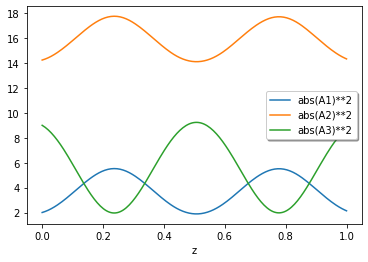

In [545]:
plt.plot(z_eval, square(absolute(A_sol_scipy.T))) 
plt.legend(['abs(A1)**2', 'abs(A2)**2', 'abs(A3)**2'], shadow=True) 
plt.xlabel('z')
plt.show()

### Analytic Solution Using Weierstrass Sigma Functions

In [491]:
def mpc_to_float(mpc_val):
    return float(mpc_val.real) + float(mpc_val.imag)*1j

mpc_to_float_np = np.vectorize(mpc_to_float)

# The analytic solution
we = Weierstrass()
def sigma_sol(A0, z0, xi, rho, omegas):
    return lambda z: (
        A0 * (we.wsigma(-z0, omegas) * we.wsigma(xi + z -z0, omegas) / 
        (we.wsigma(xi - z0, omegas) * we.wsigma(z - z0, omegas))) *mpexp(z * rho)
    )

In [556]:
# Calculate values for intermediate constants in terms of initial conditions
A_init_subs = [
    (A1(z), A_0[0]), (A2(z), A_0[1]), (A3(z), A_0[2]), 
    (Ac1(z), conj(A_0[0])), (Ac2(z), conj(A_0[1])), (Ac3(z), conj(A_0[2]))
]
A0_init_subs = [(x[0].subs(z,0), x[1]) for x in A_init_subs]
Pval_ = float(Pval.subs(A_init_subs).expand())
Qval_ = float(Qval.subs(A_init_subs).expand())
Kval_ = float(Kval.subs(A_init_subs).expand())
PQK_val_subs = [(P, Pval_), (Q, Qval_), (K, Kval_)]
p1val_ = float(p1val.subs(PQK_val_subs))
p2val_ = float(p2val.subs(PQK_val_subs))
p3val_ = float(p3val.subs(PQK_val_subs))
p_subs = [(p1, p1val_), (p2, p2val_), (p3, p3val_)]
# Calculate values for elliptic invariants in terms of initial conditions
g2val_ = float(g2val.subs(PQK_val_subs))
g3val_ = float(g3val.subs(PQK_val_subs))
# Calculate lattice of elliptic functions (half-periods) in terms of initial conditions
omega = we.omega_from_g(g2val_, g3val_)
omega1 = mpc_to_float(omega[0])
omega2 = mpc_to_float(omega[1])
if im(omega2/omega1) <= 0:
    omega2 = -omega2
omegas = (omega1, omega2)  
# Calculate complex constants in the z plane in terms of initial conditions via inverse Weierstrass P (elliptic integral)
xi1val_ = mpc_to_float(we.invwp(xi1_p1.rhs.subs(p_subs), omegas, w_prime=eq_pwp_xi1.rhs.subs(p_subs)))
xi2val_ = mpc_to_float(we.invwp(xi2_p2.rhs.subs(p_subs), omegas, w_prime=eq_pwp_xi2.rhs.subs(p_subs)))
xi3val_ = mpc_to_float(we.invwp(xi3_p1_p2.rhs.subs(p_subs), omegas, w_prime=eq_pwp_xi3.rhs.subs(p_subs)))
wz0 = pw_z0_eq.rhs.subs(A0_init_subs).subs(p_subs).expand()
wz0p = pwp_z0_eq.rhs.subs(A0_init_subs).subs(p_subs).expand()
z0val_ = mpc_to_float(we.invwp(wz0, omegas, wz0p))
# Calculate constants dependant on Weierstrass Zeta
zw_xi1val_ = mpc_to_float(we.wzeta(xi1val_, omegas))
zw_xi2val_ = mpc_to_float(we.wzeta(xi2val_, omegas))
zw_xi3val_ = mpc_to_float(we.wzeta(xi3val_, omegas))
rho1val_ = -zw_xi1val_ + 1j/2
rho2val_ = -zw_xi2val_ + 1j/2
rho3val_ = -zw_xi3val_ + 3j/2

# Complex valued analytic vector solution (numeric evaluation)
A_sol_mpmath = np.array([
    mpc_to_float_np(np.vectorize(sigma_sol(A_0[0], z0val_, xi1val_, rho1val_, omegas))(z_eval)),
    mpc_to_float_np(np.vectorize(sigma_sol(A_0[1], z0val_, xi2val_, rho2val_, omegas))(z_eval)),
    mpc_to_float_np(np.vectorize(sigma_sol(A_0[2], z0val_, xi3val_, rho3val_, omegas))(z_eval))
])

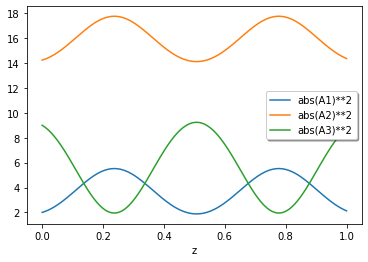

In [565]:
plt.plot(z_eval, square(absolute(A_sol_mpmath.T))) 
plt.legend(['abs(A1)**2', 'abs(A2)**2', 'abs(A3)**2'], shadow=True) 
plt.xlabel('z')
plt.show()